<a href="https://colab.research.google.com/github/XTMay/VibeCoding_ClaudeCode/blob/main/lecture/%E6%A8%A1%E5%9E%8B%E4%B8%8A%E4%B8%8B%E6%96%87%E5%8D%8F%E8%AE%AE%EF%BC%88MCP%EF%BC%89%E8%AF%A6%E8%A7%A3%E5%8F%8A_AI_Agent_%E4%BA%A4%E4%BA%92%E5%AE%9E%E8%B7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Context Protocol（MCP）详解及 AI Agent 交互实践

## 目录
	1.	什么是 Model Context Protocol (MCP)？
	2.	MCP 的设计目标与核心价值
	3.	MCP 的关键特性与组成
	4.	MCP 的应用场景
	5.	MCP 在 AI Agent 生态中的角色
	6.	MCP 详细结构设计
	7.	AI Agent 与 MCP 的交互流程
	8.	MCP 传递上下文的技术细节
	9.	多 Agent 协作中的 MCP
	10.	MCP 安全与隐私考虑
	11.	实战示例：Python 中 AI Agent 与 MCP 的交互
	12.	未来趋势和挑战
	13.	总结

## 1. 什么是 Model Context Protocol (MCP)？



> MCP is an open protocol that standardizes how applications provide context to large language models (LLMs). Think of MCP like a USB-C port for AI applications. Just as USB-C provides a standardized way to connect your devices to various peripherals and accessories, MCP provides a standardized way to connect AI models to different data sources and tools. MCP enables you build agents and complex workflows on top of LLMs and connects your models with the world.

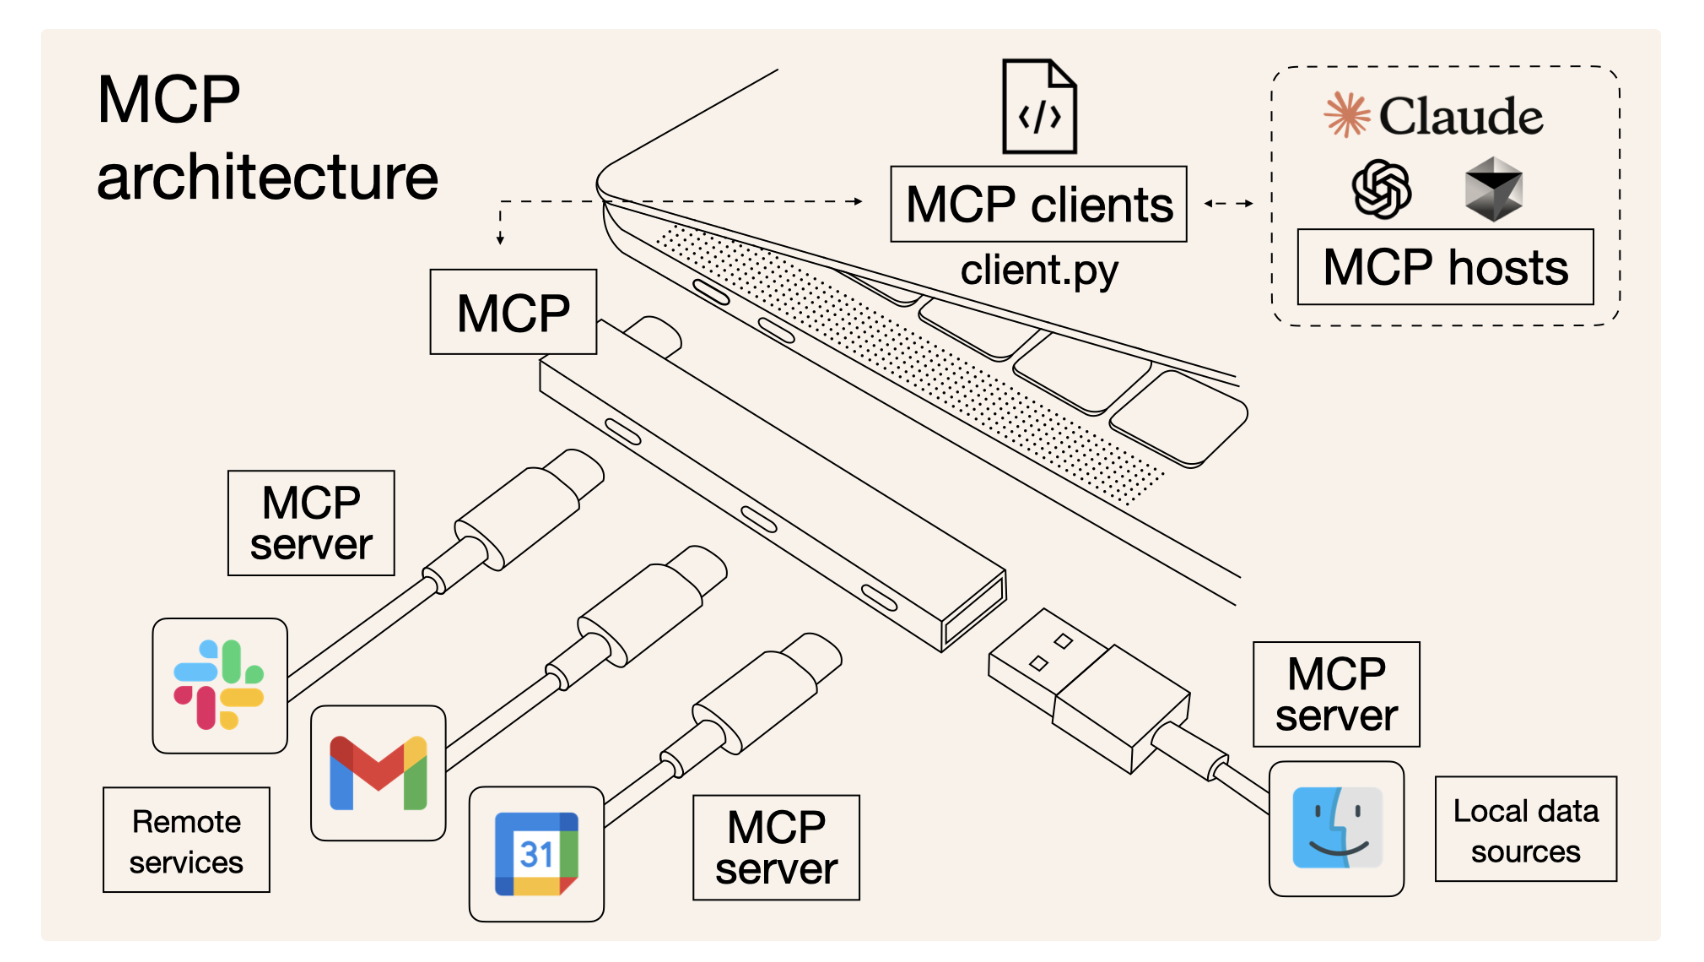


	•	MCP 是用于标准化管理和传递 AI 模型上下文信息的协议或框架。
	•	“上下文”指模型推理时依赖的外部信息，比如用户信息、会话历史、任务状态和环境数据。
	•	目的在于让模型获得结构化、丰富的上下文，提升准确性、个性化和智能化。

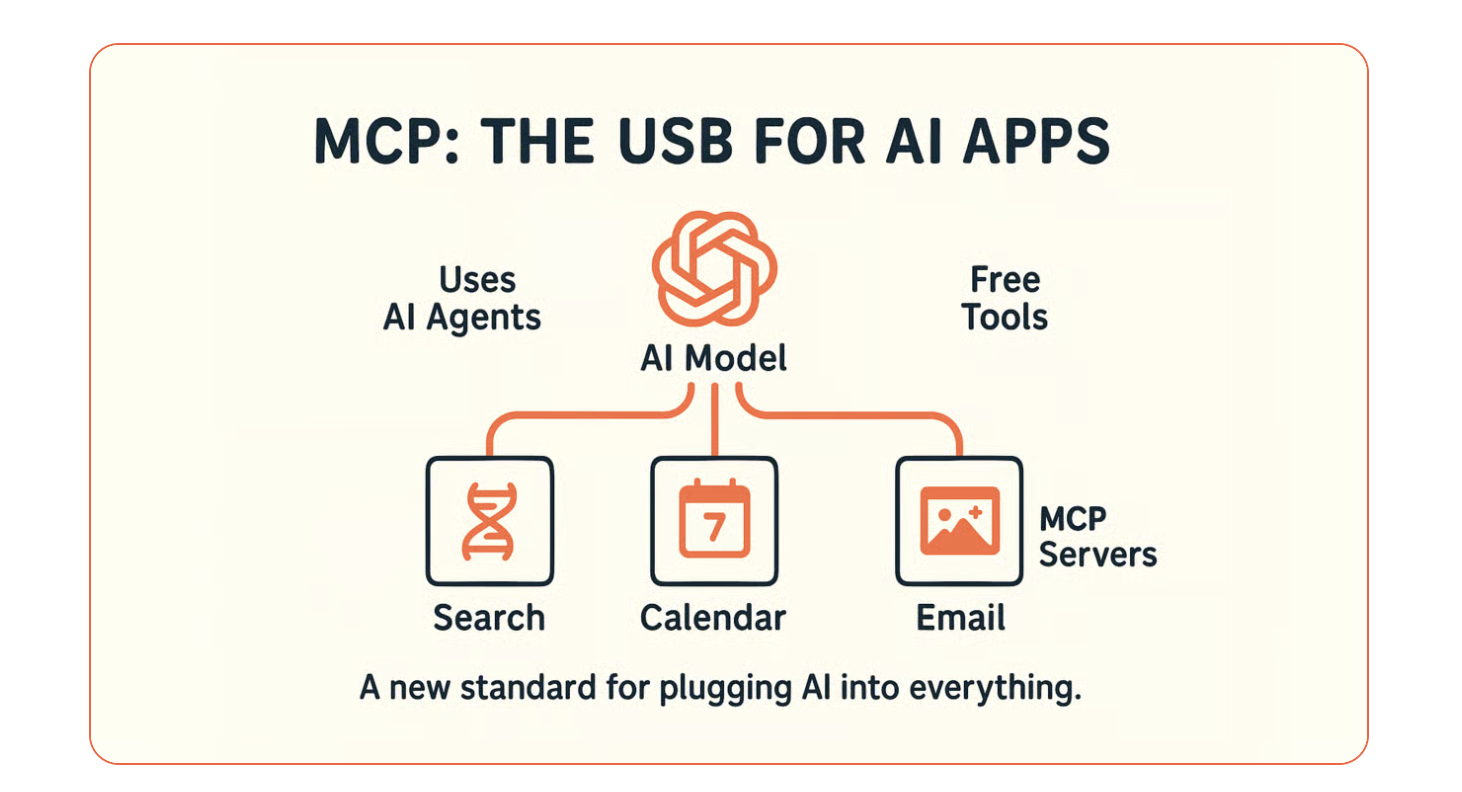

## 2. MCP 的设计目标与核心价值

	•	标准化上下文传递，方便不同系统间无缝共享信息。
	•	丰富上下文层次，覆盖用户、会话、任务、环境等多维信息。
	•	模块化扩展，支持自定义字段和版本升级。
	•	隐私安全，保障敏感信息安全传递。
	•	跨系统互操作，支持多种网络传输协议。

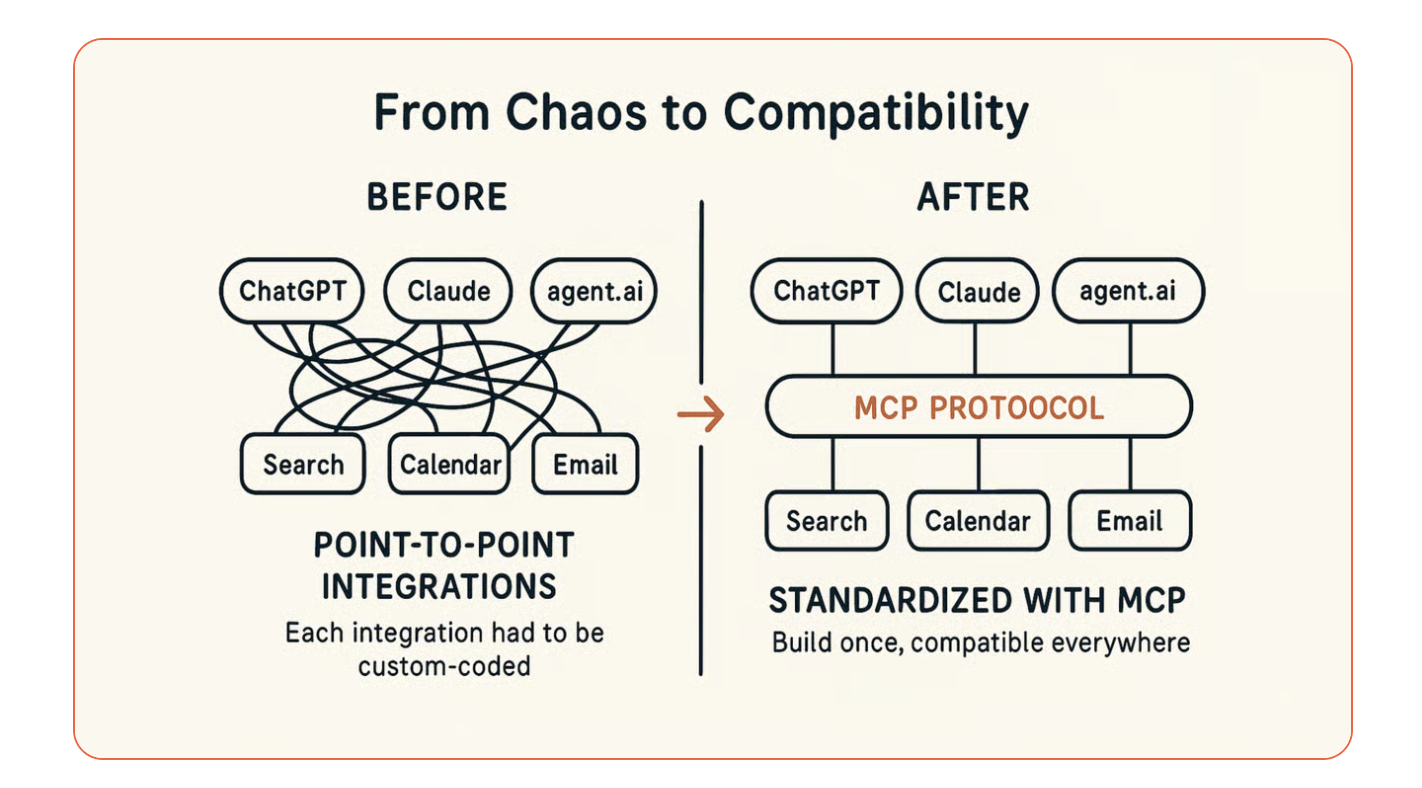

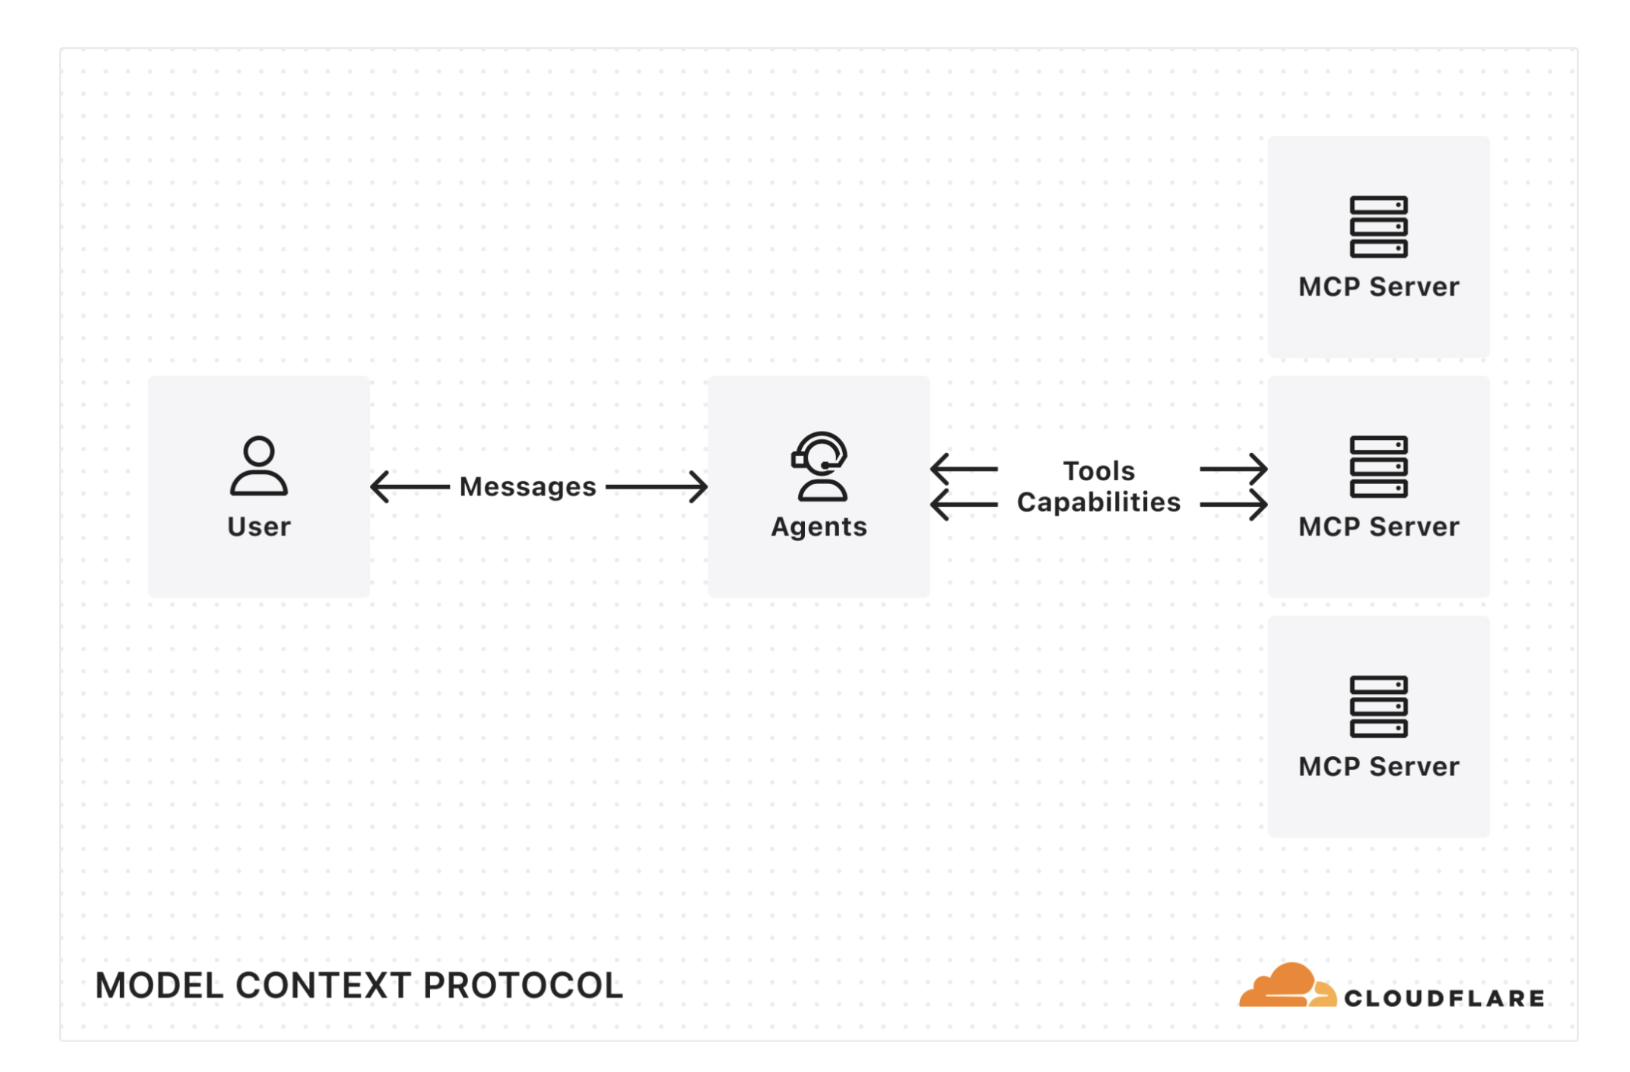

## 3. MCP 的关键特性与组成

- **结构化格式**：通常采用 JSON、Protobuf 等机器可读格式
- **上下文层级**：用户上下文、会话上下文、任务上下文、环境上下文等
- **可扩展字段**：支持自定义字段，满足不同场景需求
- **版本控制**：版本号管理，保证协议演进兼容
- **安全策略**：敏感字段加密和访问权限控制
- **传输协议无关**：可支持 HTTP、WebSocket、消息队列等多种通信方式

## 4. MCP 的应用场景

	•	对话式 AI：多轮对话管理，记忆用户偏好和上下文。
	•	AI Agent 编排：多个智能体间上下文协作，实现复杂任务分工。
	•	跨平台集成：不同系统共享用户状态和会话信息。
	•	知识增强推理：注入外部知识库和实时数据。
	•	多模态交互：整合语音、图像等多种上下文信息。

本地文件系统服务器 （[local filesystem server](https://github.com/modelcontextprotocol/servers/tree/main/src/filesystem)）

### MCP 架构中的关键参与者

	•	MCP 主机（MCP Host）： 负责协调和管理一个或多个 MCP 客户端的 AI 应用程序。
	•	MCP 客户端（MCP Client）： 与 MCP 服务器保持连接的组件，从 MCP 服务器获取上下文信息，供 MCP 主机使用。
	•	MCP 服务器（MCP Server）：向 MCP 客户端提供上下文数据的程序。

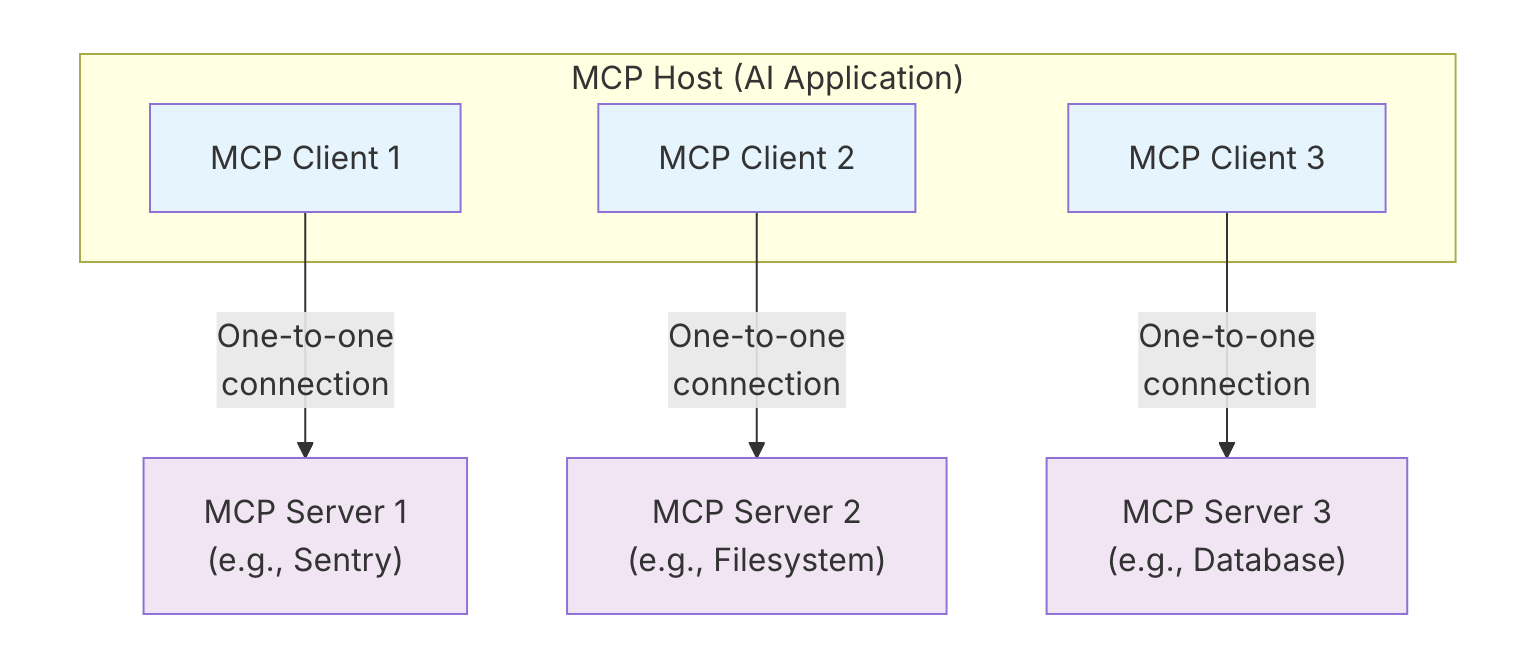

## 5. MCP 在 AI Agent 生态中的角色



> give AI agents a consistent way to connect with tools, services, and data — no matter where they live or how they’re built.


	•	AI Agent 具备一定自主决策和行动能力，需依赖上下文实现智能响应。
	•	MCP 是 Agent 之间以及 Agent 与用户、系统之间上下文交换的“桥梁”和“语言”。
	•	支持任务分配、资源调用、状态同步等多种智能体协作场景。

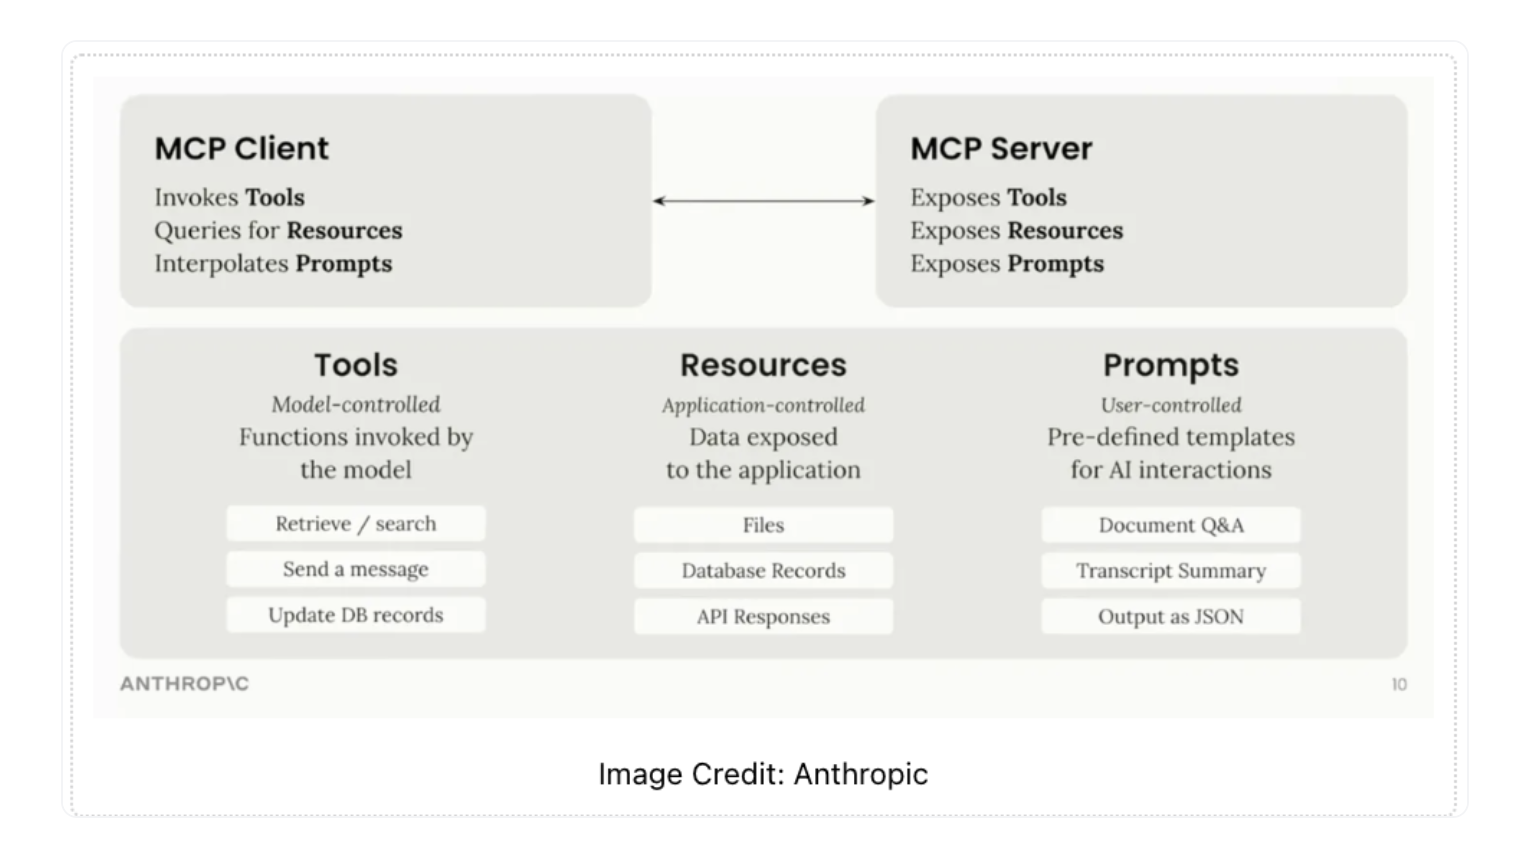

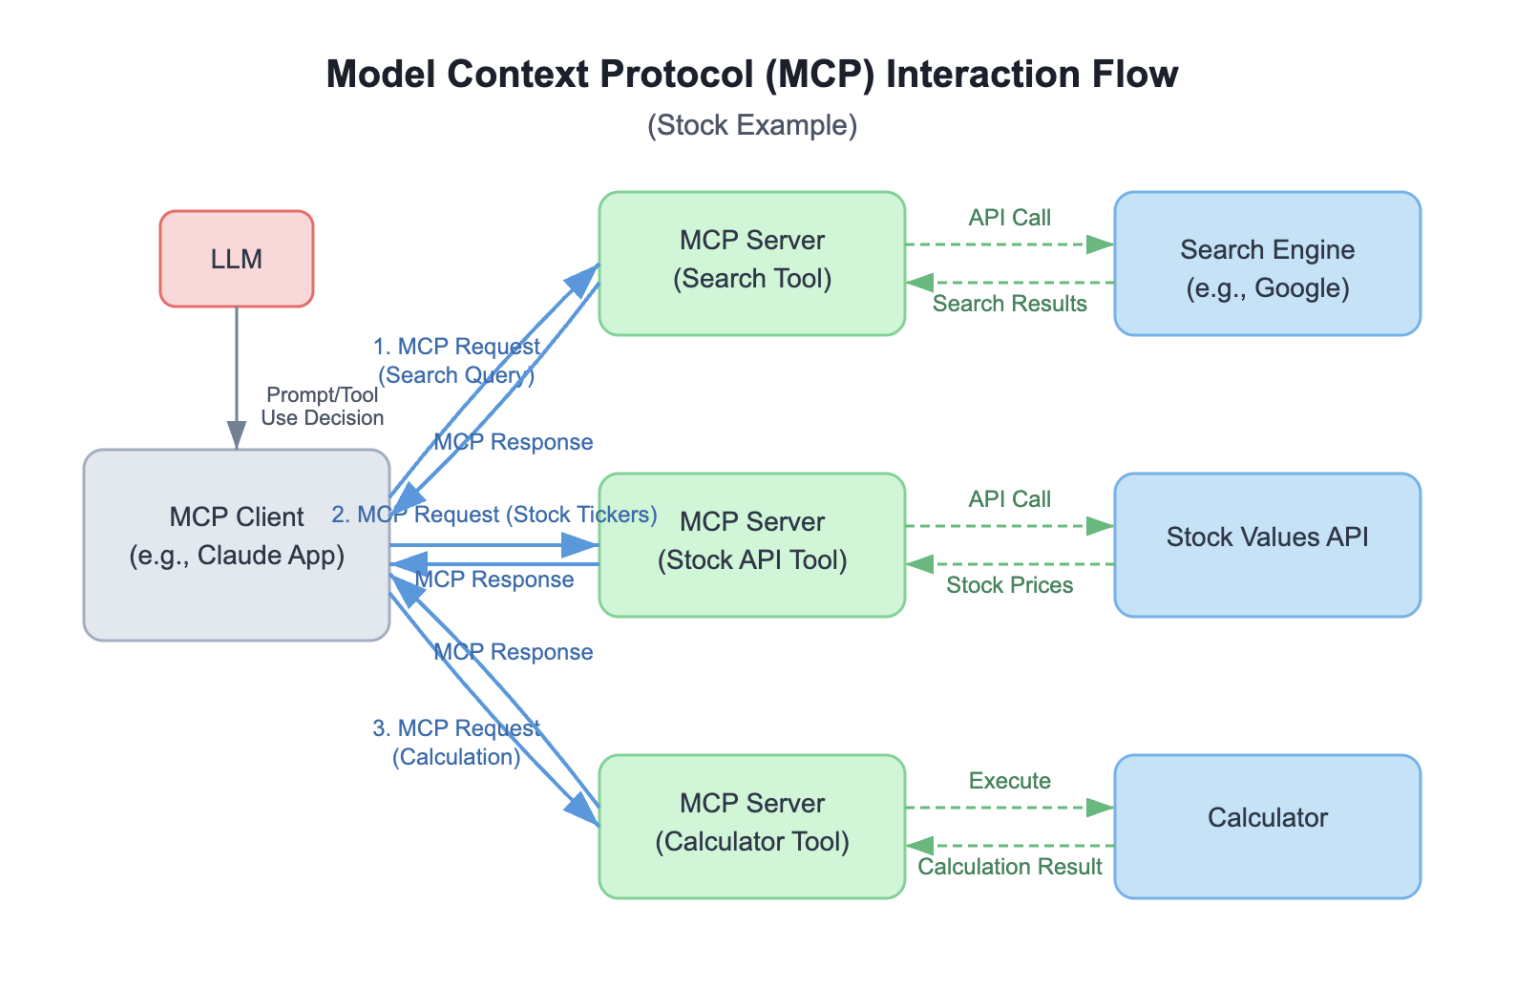

## 6. MCP 详细结构设计

示例 MCP JSON 结构：

```
{
  "protocol_version": "1.0",
  "timestamp": "2025-08-09T10:00:00Z",
  "user_context": {
    "user_id": "user_123",
    "preferences": {"language": "zh-CN", "timezone": "Asia/Shanghai"}
  },
  "session_context": {
    "session_id": "sess_456",
    "conversation_history": [
      {"role": "user", "text": "帮我写封邮件"},
      {"role": "agent", "text": "请告诉我邮件内容"}
    ]
  },
  "task_context": {
    "task_id": "task789",
    "current_step": 2,
    "parameters": {"recipient": "boss@example.com"}
  },
  "environment_context": {
    "device": "mobile",
    "location": "Beijing"
  },
  "security": {
    "auth_token": "xxxxxx",
    "encryption": "AES-256"
  }
}
```

## 7. AI Agent 与 MCP 的交互流程

	1.	初始化 MCP：构建包含用户、会话、任务等信息的上下文数据。
	2.	发送请求：客户端将 MCP 及用户输入发送给 AI Agent。
	3.	解析上下文：Agent 解析 MCP，结合上下文与用户输入推理生成响应。
	4.	更新状态：Agent 更新会话历史和任务状态，生成新的 MCP。
	5.	多轮交互：持续基于最新 MCP 进行对话和任务推进。
	6.	上下文清理：会话结束后清理敏感数据。

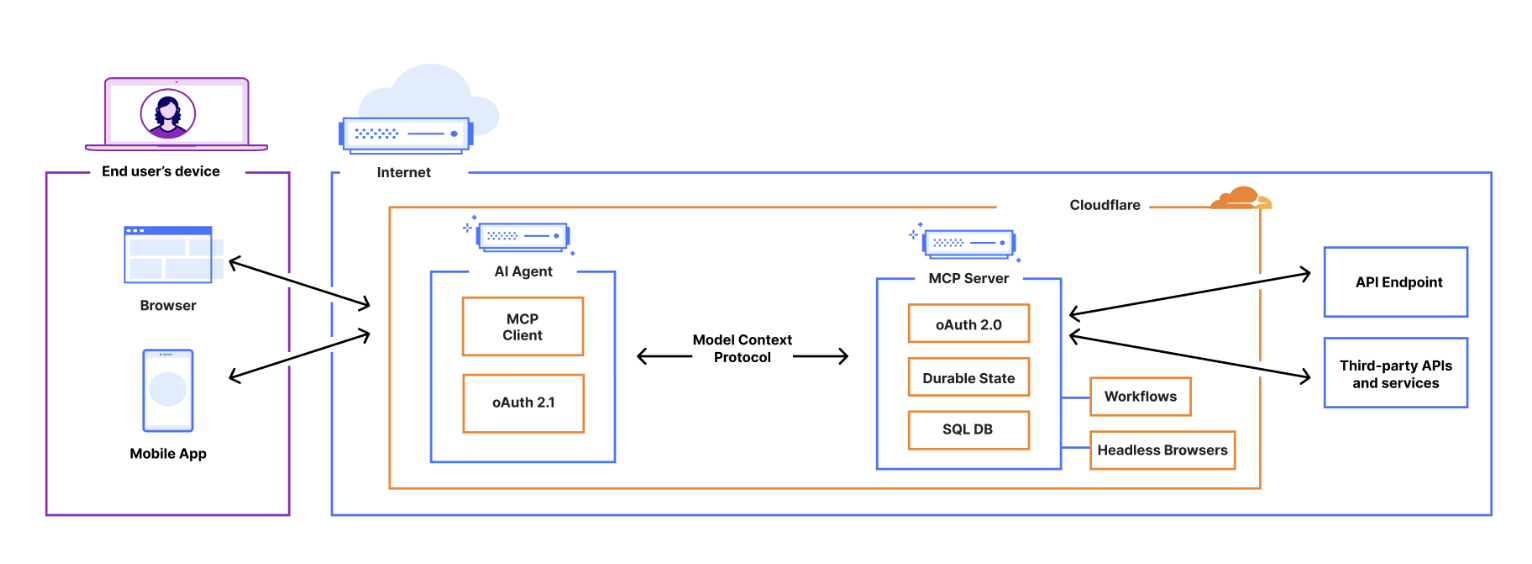

## 8. MCP 传递上下文的技术细节

	•	序列化格式：常用 JSON，Protobuf 适合性能要求高场景。
	•	传输协议：HTTP REST、WebSocket、消息队列等。
	•	上下文同步：单向（客户端发）或双向（Agent反馈更新）。
	•	上下文大小限制：需设计摘要压缩策略应对模型上下文窗口限制。
	•	版本管理：通过版本号实现协议升级兼容。

## 9. 多 Agent 协作中的 MCP

	•	多 Agent 通过 MCP 共享上下文，实现任务拆分和协同。
	•	需要明确上下文归属、权限控制和上下文拼接策略。
	•	保证上下文传递顺序和数据一致性。

## 10. MCP 安全与隐私考虑

	•	认证授权确保上下文访问安全。
	•	敏感信息加密传输和存储。
	•	会话结束及时清理数据。
	•	访问和修改日志审计。

## 11. 实战示例：Python 中 AI Agent 与 MCP 的交互

In [ ]:
import json
import time

class MCP:
    def __init__(self, user_id, session_id, conversation_history=None, task_context=None, environment=None):
        self.protocol_version = "1.0"
        self.timestamp = time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime())
        self.user_context = {
            "user_id": user_id,
            "preferences": {"language": "zh-CN"}
        }
        self.session_context = {
            "session_id": session_id,
            "conversation_history": conversation_history or []
        }
        self.task_context = task_context or {}
        self.environment_context = environment or {"device": "web"}
        self.security = {"auth_token": "securetoken123"}

    def to_json(self):
        return json.dumps({
            "protocol_version": self.protocol_version,
            "timestamp": self.timestamp,
            "user_context": self.user_context,
            "session_context": self.session_context,
            "task_context": self.task_context,
            "environment_context": self.environment_context,
            "security": self.security
        }, ensure_ascii=False, indent=2)

def agent_process(mcp_json, user_input):
    mcp_data = json.loads(mcp_json)
    print(f"[Agent] 收到 MCP，上下文对话条数：{len(mcp_data['session_context']['conversation_history'])}")
    reply = f"基于上下文，收到您的请求：'{user_input}'，正在处理..."
    mcp_data['session_context']['conversation_history'].append({"role": "user", "text": user_input})
    mcp_data['session_context']['conversation_history'].append({"role": "agent", "text": reply})
    new_mcp_json = json.dumps(mcp_data, ensure_ascii=False, indent=2)
    return new_mcp_json, reply

if __name__ == "__main__":
    mcp = MCP(
        user_id="u10001",
        session_id="sess20250809",
        conversation_history=[
            {"role": "user", "text": "你好"},
            {"role": "agent", "text": "您好，有什么可以帮您？"}
        ],
        task_context={"task_id": "t123", "current_step": 1},
        environment={"device": "mobile", "location": "Shanghai"}
    )
    print("=== 初始 MCP ===")
    print(mcp.to_json())

    user_msg = "帮我订个明天去北京的机票"
    new_mcp_json, reply = agent_process(mcp.to_json(), user_msg)

    print("\n=== Agent 回复 ===")
    print(reply)
    print("\n=== 更新后 MCP ===")
    print(new_mcp_json)

=== 初始 MCP ===
{
  "protocol_version": "1.0",
  "timestamp": "2025-08-10T01:42:58Z",
  "user_context": {
    "user_id": "u10001",
    "preferences": {
      "language": "zh-CN"
    }
  },
  "session_context": {
    "session_id": "sess20250809",
    "conversation_history": [
      {
        "role": "user",
        "text": "你好"
      },
      {
        "role": "agent",
        "text": "您好，有什么可以帮您？"
      }
    ]
  },
  "task_context": {
    "task_id": "t123",
    "current_step": 1
  },
  "environment_context": {
    "device": "mobile",
    "location": "Shanghai"
  },
  "security": {
    "auth_token": "securetoken123"
  }
}
[Agent] 收到 MCP，上下文对话条数：2

=== Agent 回复 ===
基于上下文，收到您的请求：'帮我订个明天去北京的机票'，正在处理...

=== 更新后 MCP ===
{
  "protocol_version": "1.0",
  "timestamp": "2025-08-10T01:42:58Z",
  "user_context": {
    "user_id": "u10001",
    "preferences": {
      "language": "zh-CN"
    }
  },
  "session_context": {
    "session_id": "sess20250809",
    "conversation_history": [
      {
       

## 12. 未来趋势和挑战

	•	推动 MCP 标准化，促进跨平台生态融合。
	•	智能化上下文管理，实现自动筛选和压缩。
	•	多模态、多语言上下文融合与共享。
	•	集成先进隐私保护技术。
	•	AI Agent 动态自适应上下文处理能力。

## 13. 总结

	•	MCP 是 AI Agent 体系中上下文共享和智能交互的核心协议。
	•	它通过标准化、结构化的上下文传递，增强 AI 交互的智能和连贯。
	•	理解 MCP 设计和应用，有助于构建高效、安全、协同的智能系统。
	•	未来 MCP 将随着 AI 生态的复杂化而不断发展完善。

- [Introducing the Model Context Protocol](https://www.anthropic.com/news/model-context-protocol)

- [MCP Explained: The New Standard Connecting AI to Everything](https://medium.com/@elisowski/mcp-explained-the-new-standard-connecting-ai-to-everything-79c5a1c98288)

- [模型上下文协议](https://zh.wikipedia.org/wiki/%E6%A8%A1%E5%9E%8B%E4%B8%8A%E4%B8%8B%E6%96%87%E5%8D%8F%E8%AE%AE)

- [MCP: A Simple Guide To Going Further With AI](https://simple.ai/p/mcp-a-simple-guide-to-going-further-with-ai-is-the-next-competitive-edge-in-ai)